In [48]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
unified = Path("../data/processed/").glob("unified_evaluation_results_*.csv")

In [50]:
df = pd.concat(
    [pd.read_csv(f, index_col=0) for f in unified],
    ignore_index=True,
    sort=False,
)

In [58]:
df["feature"] = df["feature"].str.replace("url_heading_subhead", "url_title_subtitle")

In [59]:
top5_by_dataset = df.sort_values('f1', ascending=False).groupby('dataset').head(5)
top5_by_dataset.sort_values(['dataset', 'f1'], inplace=True, ascending=[True, False])
top5_by_dataset

,precision,recall,f1,throughput,n_samples,model,dataset,feature,run_id,distant_labeling_info
3,0.872261,0.867765,0.869669,487.485130,14417,distilbert,huffpo,url_title_subtitle,20250628_153349,NaN
0,0.815324,0.794754,0.803529,522.258866,14417,distilbert,huffpo,title_subtitle,20250628_153349,NaN
5,0.798726,0.793340,0.795516,1777.344741,14417,distilbert,huffpo,url_path_raw,20250628_153349,NaN
4,0.800664,0.791294,0.795440,824.030019,14417,distilbert,huffpo,url_raw,20250628_153349,NaN
6,0.798136,0.789438,0.793264,2569.199394,14417,distilbert,huffpo,url_path_cleaned,20250628_153349,NaN
54,0.983424,0.984203,0.983795,634.477255,9803,distilbert,recognasumm,url_title_subtitle,20250628_153349,NaN
57,0.966286,0.962353,0.964141,2368.458045,9803,distilbert,recognasumm,url_path_cleaned,20250628_153349,NaN
55,0.965481,0.961321,0.963224,1430.243731,9803,distilbert,recognasumm,url_raw,20250628_153349,NaN
56,0.962961,0.959451,0.961037,1586.721896,9803,distilbert,recognasumm,url_path_raw,20250628_153349,NaN
77,0.954776,0.954546,0.954475,117.207182,9803,xgboost,recognasumm,url_path_raw,20250628_153349,NaN


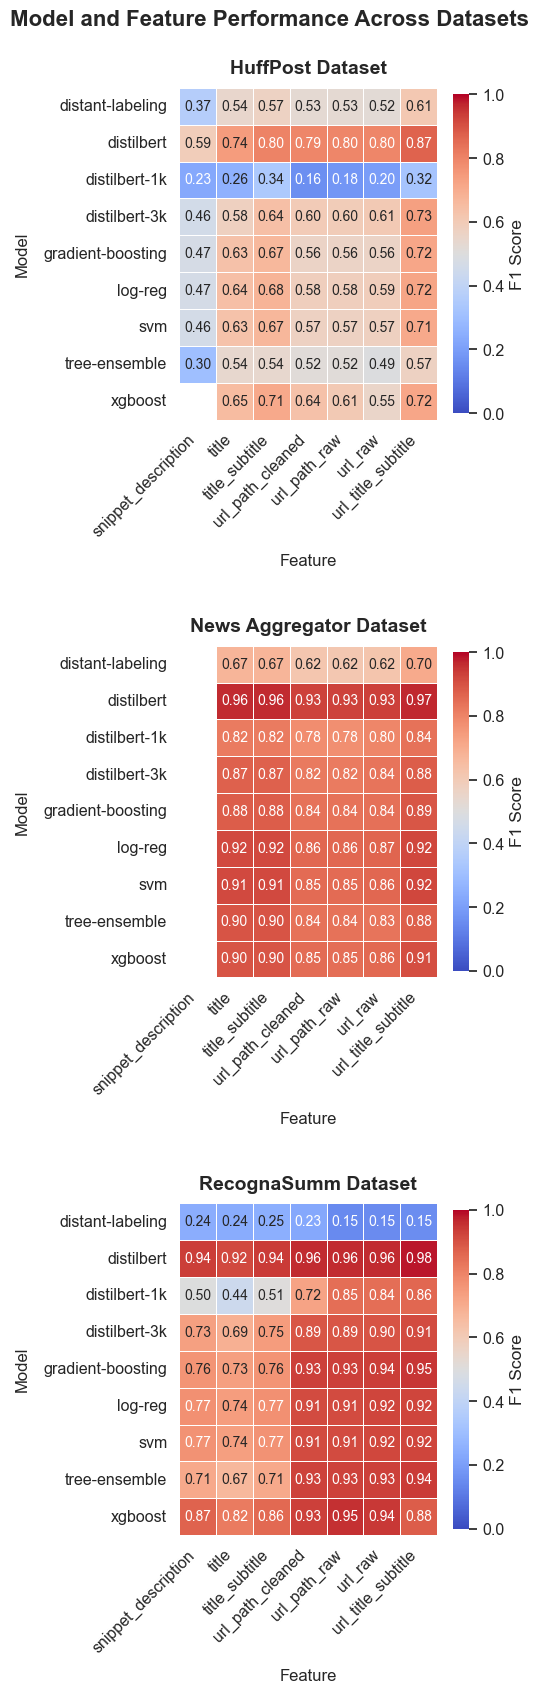

In [72]:
# Set style for better aesthetics
sns.set_style("white")
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'sans-serif'

# Get unique features and models to ensure consistent ordering
all_features = sorted(df['feature'].unique())
all_models = sorted(df['model'].unique())

# Create the FacetGrid with better spacing and size
g = sns.FacetGrid(df, col="dataset", col_wrap=1, 
                  height=6, aspect=0.9,  # Increased size for more padding
                  sharex=False, sharey=False)

# Define a function to create consistent heatmaps
def draw_consistent_heatmap(data, **kwargs):
    # Get current dataset
    current_dataset = data['dataset'].iloc[0]
    
    # Pivot the data
    pivot_data = data.pivot(index="model", columns="feature", values="f1")
    
    # Reindex to ensure consistent ordering
    pivot_data = pivot_data.reindex(index=all_models, columns=all_features)
    
    # Create the heatmap
    ax = plt.gca()
    sns.heatmap(pivot_data,
                annot=True,
                fmt=".2f",
                cmap="coolwarm",
                center=0.5,
                cbar_kws={'label': 'F1 Score', 'shrink': 0.8},
                square=True,
                linewidths=0.5,
                linecolor='white',
                vmin=0, vmax=1,
                annot_kws={'size': 10},  # Smaller font for annotations
                ax=ax)
    
    # Ensure ticks are visible
    ax.set_xticks(np.arange(len(all_features)) + 0.5)
    ax.set_yticks(np.arange(len(all_models)) + 0.5)
    ax.set_xticklabels(all_features, rotation=45, ha='right')
    ax.set_yticklabels(all_models, rotation=0)
    
    # Make sure ticks are shown
    ax.tick_params(axis='both', which='major', length=5, width=1, direction='out')

# Map the function
g.map_dataframe(draw_consistent_heatmap)

# Improve the formatting
for ax in g.axes.flat:
    # Clean up the title
    title = ax.get_title()

    mapping = {
        "huffpo": "HuffPost",
        "uci": "News Aggregator",
        "recognasumm": "RecognaSumm",
    }

    if title and '=' in title:
        dataset_name = title.split('=')[-1].strip()
        ax.set_title(f'{mapping[dataset_name]} Dataset', 
                    fontsize=14, fontweight='bold', pad=10)
    
    # Add axis labels
    ax.set_xlabel('Feature', fontsize=12, labelpad=10)
    ax.set_ylabel('Model', fontsize=12, labelpad=10)

# Add overall title with proper spacing
g.fig.suptitle('Model and Feature Performance Across Datasets', 
               fontsize=16, fontweight='bold', y=0.925)  # Increased y position

# Adjust layout for better spacing
plt.tight_layout()
g.fig.subplots_adjust(top=0.90, wspace=0.3, hspace=0.4)  # Reduced top to make room for title

# Show the plot
plt.show()

In [57]:
df.groupby(["dataset", "model"]).f1.mean()

dataset      model            
huffpo       distant-labeling     0.523880
             distilbert           0.770751
             distilbert-1k        0.240571
             distilbert-3k        0.601955
             gradient-boosting    0.594888
             log-reg              0.608953
             svm                  0.598876
             tree-ensemble        0.497302
             xgboost              0.645628
recognasumm  distant-labeling     0.201856
             distilbert           0.952216
             distilbert-1k        0.674224
             distilbert-3k        0.822826
             gradient-boosting    0.858565
             log-reg              0.850298
             svm                  0.848910
             tree-ensemble        0.830020
             xgboost              0.894151
uci          distant-labeling     0.651499
             distilbert           0.946209
             distilbert-1k        0.803497
             distilbert-3k        0.851636
             gradient-b

In [73]:
df

,precision,recall,f1,throughput,n_samples,model,dataset,feature,run_id,distant_labeling_info
0,0.815324,0.794754,0.803529,522.258866,14417,distilbert,huffpo,title_subtitle,20250628_153349,NaN
1,0.755390,0.737253,0.744447,3059.556305,14417,distilbert,huffpo,title,20250628_153349,NaN
2,0.627584,0.574651,0.593389,573.958727,14417,distilbert,huffpo,snippet_description,20250628_153349,NaN
3,0.872261,0.867765,0.869669,487.485130,14417,distilbert,huffpo,url_title_subtitle,20250628_153349,NaN
4,0.800664,0.791294,0.795440,824.030019,14417,distilbert,huffpo,url_raw,20250628_153349,NaN
...,...,...,...,...,...,...,...,...,...,...
174,0.774025,0.758456,0.764597,4075.859980,9803,gradient-boosting,recognasumm,snippet_description,20250628_162815,NaN
175,0.947899,0.948413,0.948084,5037.813224,9803,gradient-boosting,recognasumm,url_title_subtitle,20250628_162815,NaN
176,0.934873,0.936294,0.935272,6550.474139,9803,gradient-boosting,recognasumm,url_raw,20250628_162815,NaN
177,0.931611,0.931394,0.931249,7013.881235,9803,gradient-boosting,recognasumm,url_path_raw,20250628_162815,NaN


In [108]:
top1 = df.sort_values('f1', ascending=False).groupby(['model', 'dataset']).head(1)
top1 = top1[~top1.model.isin(["distilbert-1k", "distilbert-3k"])]

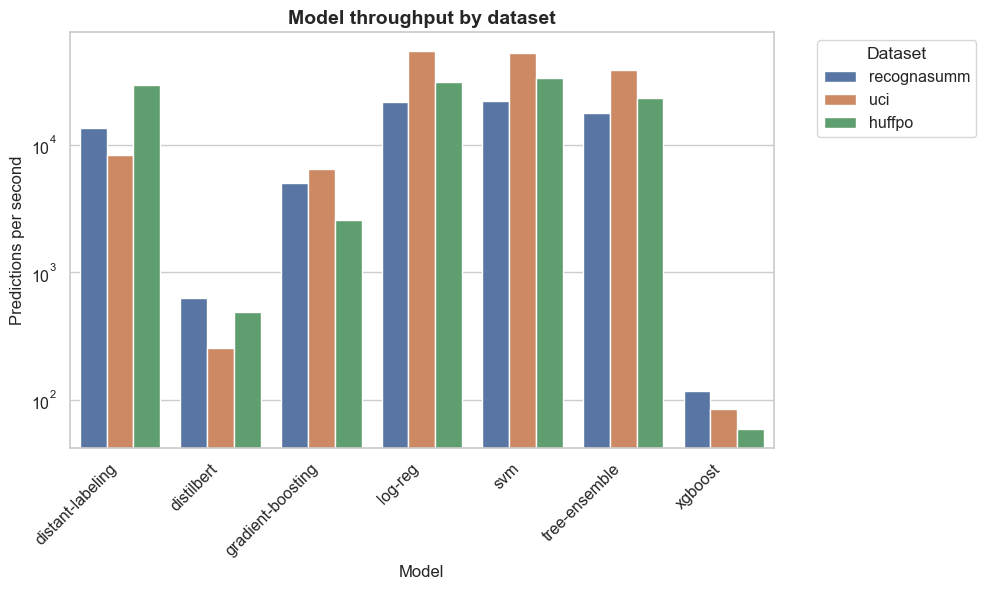

In [109]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    top1, 
    x="model", 
    y="throughput", 
    hue="dataset", 
    order=sorted(top1["model"].unique())
)
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Predictions per second", fontsize=12)
ax.set_title("Model throughput by dataset", fontsize=14, fontweight='bold')
ax.set_yscale("log")
ax.legend(title="Dataset", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.yticks()
plt.tight_layout()
plt.show()

In [99]:
top1 = df.sort_values('f1', ascending=False).groupby(['model', 'dataset']).head(1)
top1 = top1[top1.model.isin(["distilbert", "distilbert-1k", "distilbert-3k"])]

/var/folders/m8/v1brzj4s56g48wwmpht61td40000gq/T/ipykernel_33890/2987302321.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


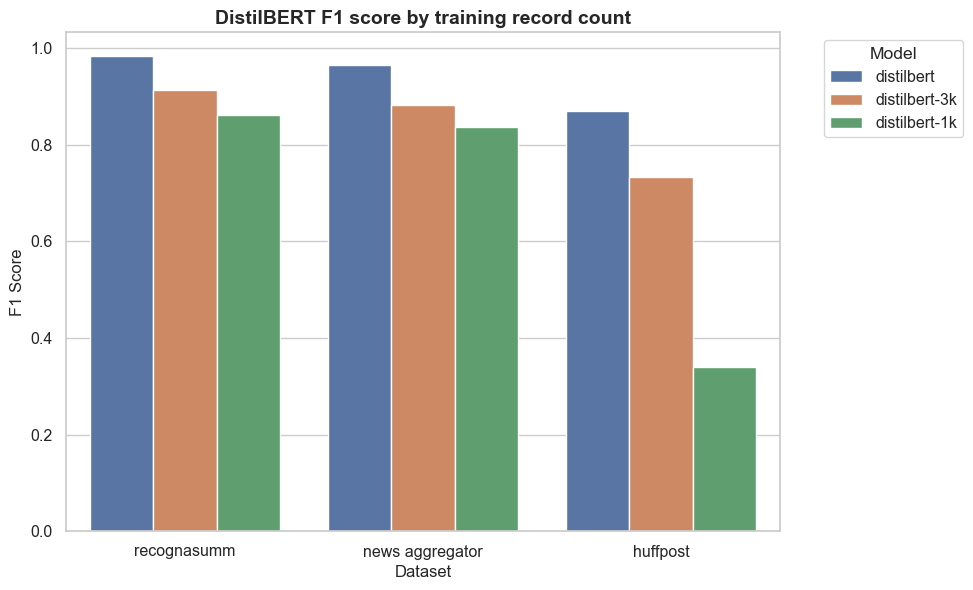

In [106]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    top1, 
    x="dataset", 
    y="f1", 
    hue="model", 
)
ax.set_xlabel("Dataset", fontsize=12)
ax.set_ylabel("F1 Score", fontsize=12)
ax.set_title("DistilBERT F1 score by training record count", fontsize=14, fontweight='bold')
plt.tight_layout()
ax.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
# Change x-axis tick labels to more readable names
dataset_label_map = {"recognasumm": "recognasumm", "uci": "news aggregator", "huffpo": "huffpost"}
new_labels = [dataset_label_map.get(label.get_text(), label.get_text()) for label in ax.get_xticklabels()]
ax.set_xticklabels(new_labels)
plt.show()